<a href="https://colab.research.google.com/github/Rodo2005/redes_convolucionales_python/blob/main/1_fashion_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales convolucionales (CNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [80]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
from keras.utils import to_categorical

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [81]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [82]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

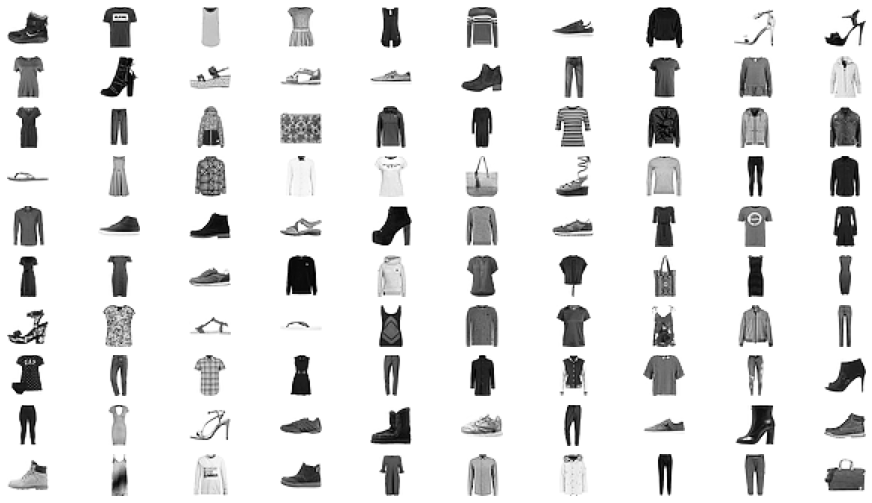

In [83]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

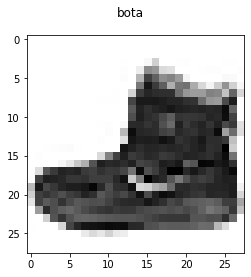

In [84]:
# Alumno, dibuje la primera imagen y su correspondiente categoria
fig = plt.figure()
ax = fig.add_subplot()
plt.suptitle(category_list[data_y_train[0]])
plt.imshow(data_X_train[0], cmap='Greys')
plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [85]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][:14])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [86]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train/255
X_test_norm = data_X_test/255

In [87]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
data_X_train.shape[0]

60000

In [88]:
# Alumno: Imprimir la dimension de la imagen
data_X_train[0].shape

(28, 28)

In [89]:
# Alumno: En estas imagenes sin escalas de grieses no vienen con el canal especificado
# Deberia ser (28, 28, 1) para poder utilizar en una red CNN
# Agregar el [samples][pixels][width][height]
X_train = X_train_norm.reshape(data_X_train.shape[0], data_X_train.shape[1], data_X_train.shape[2], 1).astype('float32')
X_test = X_test_norm.reshape(data_X_test.shape[0], data_X_test.shape[1], data_X_test.shape[2], 1).astype('float32')

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

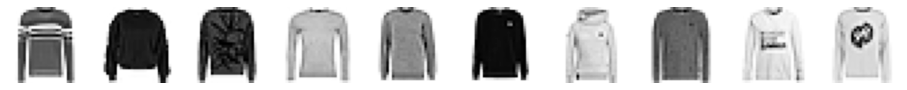

In [90]:
# Alumno: Explor los primeros diez puloveres del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if data_y_train[j] == 2:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

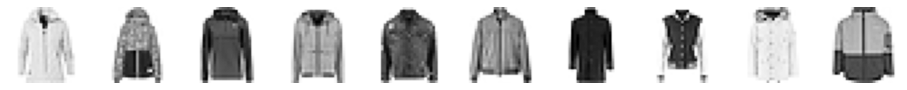

In [91]:
# Alumno: Explor los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')
    while True:
        if data_y_train[j] == 4:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [92]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train_cod = to_categorical(data_y_train, num_classes=10)
y_test_cod = to_categorical(data_y_test, num_classes=10)

In [93]:
# input shape
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [94]:
# output shape
#y_train = np.argmax(y_train_cod)
out_shape = y_train_cod.shape[1]
out_shape

10

In [95]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# Alumno, crear un modelo con la cantidad de capas de CONV y POOL
# que vea que da mejor resultado
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1568)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 101,274
Trainable params: 101,274
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Alumno: entrenar el modelo
history = model.fit(X_train, y_train_cod, validation_split=0.3, epochs=10, batch_size=64)

Epoch 1/10
657/657 [==============================] - 3s 4ms/step - loss: 0.7704 - accuracy: 0.7395 - val_loss: 0.4161 - val_accuracy: 0.8530
Epoch 2/10
657/657 [==============================] - 2s 3ms/step - loss: 0.3985 - accuracy: 0.8617 - val_loss: 0.3675 - val_accuracy: 0.8708
Epoch 3/10
657/657 [==============================] - 2s 3ms/step - loss: 0.3317 - accuracy: 0.8821 - val_loss: 0.3319 - val_accuracy: 0.8848
Epoch 4/10
657/657 [==============================] - 2s 4ms/step - loss: 0.3100 - accuracy: 0.8884 - val_loss: 0.3102 - val_accuracy: 0.8901
Epoch 5/10
657/657 [==============================] - 2s 3ms/step - loss: 0.2794 - accuracy: 0.8992 - val_loss: 0.2992 - val_accuracy: 0.8924
Epoch 6/10
657/657 [==============================] - 2s 3ms/step - loss: 0.2644 - accuracy: 0.9059 - val_loss: 0.2852 - val_accuracy: 0.8979
Epoch 7/10
657/657 [==============================] - 2s 4ms/step - loss: 0.2449 - accuracy: 0.9127 - val_loss: 0.2791 - val_accuracy: 0.9016
Epoch 

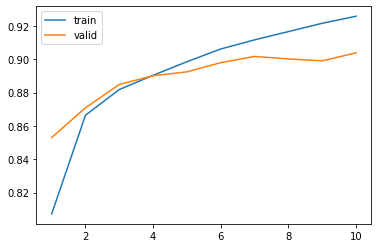

In [97]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [98]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)

In [99]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:3]

array([9, 2, 1])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [100]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test_cod)
scores[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.2851 - accuracy: 0.8997


0.8996999859809875

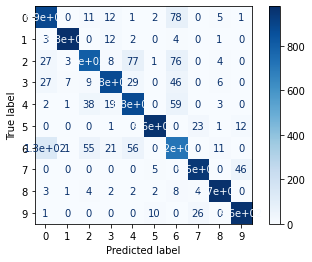

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_cod.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [102]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [104]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_saco = X_test[rank_saco]
y_test_saco = y_test_cod[rank_saco]

In [106]:
# Alumno: Calcular la exactitud de los sacos seleccionados
score = model.evaluate(X_test_saco, y_test_saco)
score[1]

1/1 [==============================] - 0s 17ms/step - loss: 1.1809 - accuracy: 0.4000


0.4000000059604645

In [107]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_prob = model.predict(X_test_saco)
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat[:]

array([2, 4, 2, 6, 2, 4, 4, 2, 4, 2])

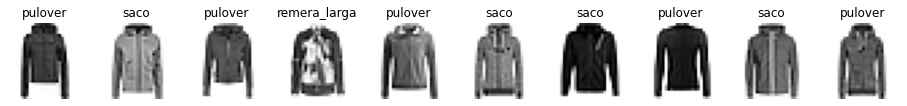

In [108]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
j = 0
fig = plt.figure(figsize=(16, 9))
for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    plt.title(category_list[y_hat[j]])
    j += 1

plt.show()